In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('/content/Survey.csv')

In [16]:
data.columns

Index(['City', 'Sex', 'Age', 'Occupation', 'Monthly Household Income',
       'Income', 'Planning to Buy a new house', 'Time Frame',
       'Reasons for buying a house', 'what type of House', 'Number of rooms',
       'Size of House', 'Budget', 'Finished/Semi Finished',
       'Influence Decision', 'Maintainance', 'EMI', '1.Proximity to city',
       '2.Proximity to schools', '3. Proximity to transport',
       '4. Proximity to work place', '5. Proximity to shopping',
       '1. Gym/Pool/Sports facility', '2. Parking space', '3.Power back-up',
       '4.Water supply', '5.Security', '1. Exterior look ', '2. Unit size',
       '3. Interior design and branded components',
       '4. Layout plan (Integrated etc.)', '5. View from apartment',
       '1. Price', '2. Booking amount', '3. Equated Monthly Instalment (EMI)',
       '4. Maintenance charges', '5. Availability of loan',
       '1. Builder reputation', '2. Appreciation potential',
       '3. Profile of neighbourhood', '4. Availabilit

In [17]:
subset_data = data.iloc[:, 18:46]
print(subset_data.head())

   2.Proximity to schools  3. Proximity to transport  \
0                       5                          5   
1                       5                          5   
2                       2                          5   
3                       5                          3   
4                       2                          3   

   4. Proximity to work place  5. Proximity to shopping  \
0                           2                         1   
1                           3                         1   
2                           2                         1   
3                           5                         4   
4                           4                         3   

   1. Gym/Pool/Sports facility  2. Parking space  3.Power back-up  \
0                            2                 5                3   
1                            1                 4                2   
2                            4                 3                2   
3                            5  

In [18]:
numeric_data = subset_data.select_dtypes(include=['float64', 'int64'])
print(numeric_data.head())

   2.Proximity to schools  3. Proximity to transport  \
0                       5                          5   
1                       5                          5   
2                       2                          5   
3                       5                          3   
4                       2                          3   

   4. Proximity to work place  5. Proximity to shopping  \
0                           2                         1   
1                           3                         1   
2                           2                         1   
3                           5                         4   
4                           4                         3   

   1. Gym/Pool/Sports facility  2. Parking space  3.Power back-up  \
0                            2                 5                3   
1                            1                 4                2   
2                            4                 3                2   
3                            5  

In [19]:
print(numeric_data.isna().sum().sum())

0


In [20]:
numeric_data = numeric_data.dropna()

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [22]:
from sklearn.cluster import KMeans
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

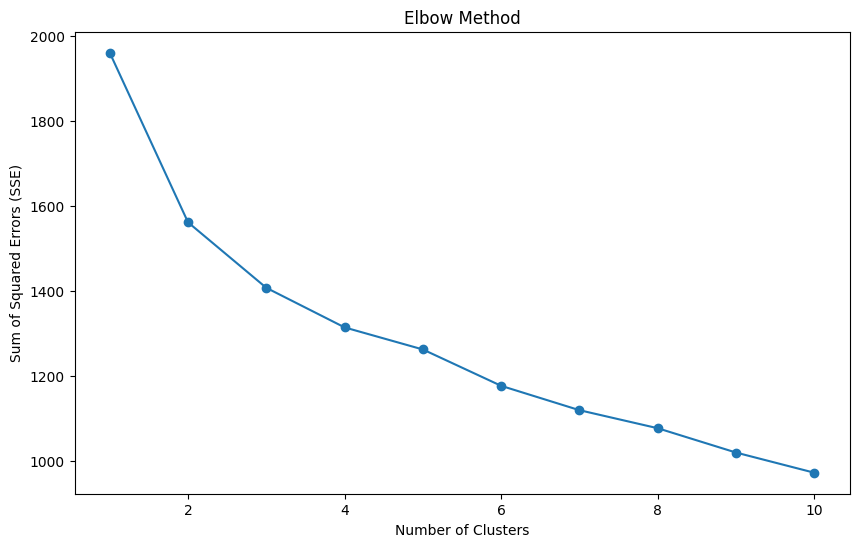

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [25]:
import numpy as np
def extract_median_age(age_range):
    ages = age_range.split('-')
    return np.median([int(age) for age in ages])

In [26]:
def extract_median_age(age_range):
    if age_range == '>60':
        return 65  # assume the median age for '>60' is 65
    elif '-' in age_range:
        ages = age_range.split('-')
        return np.median([int(age) for age in ages])
    else:
        return int(age_range)

In [28]:
data['Age'] = data['Age'].apply(extract_median_age)

In [30]:
#KMeans clustering on the preprocessed 'Age' column
kmeans = KMeans(n_clusters=5)
cluster_labels = kmeans.fit_predict(data[['Age']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
cluster_data = pd.DataFrame({'Cluster': cluster_labels, 'Age': data['Age']})
print(cluster_data.head())

   Cluster   Age
0        1  30.5
1        0  53.0
2        0  53.0
3        2  40.5
4        1  30.5


In [32]:
#calculate mean age for each cluster
cluster_means = cluster_data.groupby('Cluster')['Age'].mean()

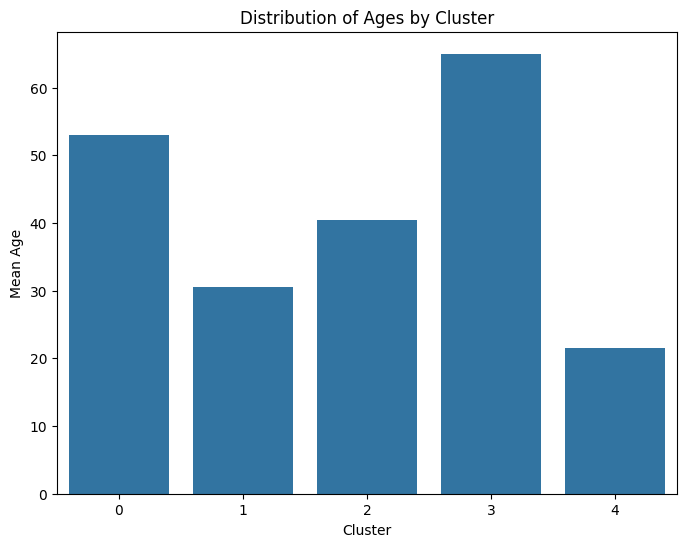

In [33]:
#visualizing the results
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_means.index, y=cluster_means.values)
plt.xlabel('Cluster')
plt.ylabel('Mean Age')
plt.title('Distribution of Ages by Cluster')
plt.show()